# Part of speech

พาร์ทหลังมิดเทอม

- lexical category
- word class

แต่ละ corpus อาจมีการติด tag ที่แตกต่างกันไป
ตัวอย่าง Tag set
- NN หรือ noun
- VB หรือ Verb

การติด tag ถือว่าเป็นส่วนหนึ่งของการดำเนินงาน nlp pipeline

ตัวอย่างงานที่นำ POS tagging ไปใช้
- text to speech
- translate
- chatbot

จะสอน วิธีการใช้/วิธีการสร้างเอง (create tagger)

คลังที่ติด tag ไว้แล้วและใช้บ่อย คือ nltk.corpus.brown

## วิธีสร้าง Tagger
- default tagger
- regular expression tagger
- uni-gram tagger
- n-gram tagger

## วิธีติด Tag
ใช้ข้อมูลมาจาก upen corpus (University of pensivania / https://www.upenn.edu/)
```python
text  = nltk.word_tokeize("I eat fish")
nltk.post_tag(text)
```

หรือวิธีที่ติด tag ให้กับ string ที่เป็น รูปแบบ "word/tag"
```python
tagged_token = nltk.tag.str2tuple('fly/NN')
```

สำหรับ corpus ที่ติด tag มาแล้ว
```python
nltk.corpus.brown.tagged_words()
```




In [3]:
import nltk
text = nltk.word_tokenize("And now for something completely difference")
print(nltk.pos_tag(text))

[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('difference', 'NN')]


In [5]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [6]:
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [7]:
nltk.help.upenn_tagset('NN.*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


### การดูว่าบริบทคล้ายกัน
แบบง่าย ใช้ .similar ถ้าไม่มี pos tag ช่วย

### Corpus ที่ติด tag ให้
- brown
- conll2000 (ภาษาสเปน, เป็น tagset พิเศษ)
- treebank 

In [9]:
#การแปลง tagset จาก upen เป็น universal
nltk.corpus.treebank.tagged_words(tagset='universal')[:10]

[('Pierre', 'NOUN'),
 ('Vinken', 'NOUN'),
 (',', '.'),
 ('61', 'NUM'),
 ('years', 'NOUN'),
 ('old', 'ADJ'),
 (',', '.'),
 ('will', 'VERB'),
 ('join', 'VERB'),
 ('the', 'DET')]

## Frequncy Distribution with tagged corpora

In [10]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news',tagset='universal')
tag_fd = nltk.FreqDist(tag for (word,tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

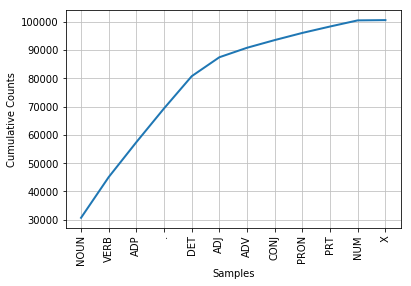

In [11]:
tag_fd.plot(cumulative=True)

## แอปสำเร็จรูป

In [15]:
import nltk
nltk.app.concordance()

In [19]:
brown_news_tagged = nltk.corpus.brown.tagged_words(tagset = 'universal')
word_tag_pairs = list(nltk.bigrams(brown_news_tagged))
print(word_tag_pairs[:5])
noun_preceders = [a[1] for (a,b) in word_tag_pairs if b[1] == 'NOUN']
print(noun_preceders[:20])
fdist = nltk.FreqDist(noun_preceders)
print([tag for (tag,_) in fdist.most_common()])

[(('The', 'DET'), ('Fulton', 'NOUN')), (('Fulton', 'NOUN'), ('County', 'NOUN')), (('County', 'NOUN'), ('Grand', 'ADJ')), (('Grand', 'ADJ'), ('Jury', 'NOUN')), (('Jury', 'NOUN'), ('said', 'VERB'))]
['DET', 'NOUN', 'ADJ', 'VERB', 'DET', 'ADP', 'ADJ', 'NOUN', 'DET', 'DET', 'VERB', 'DET', 'ADP', 'NOUN', 'DET', 'ADJ', 'ADJ', 'DET', 'DET', 'CONJ']
['DET', 'ADJ', 'NOUN', 'ADP', '.', 'VERB', 'CONJ', 'NUM', 'ADV', 'PRT', 'PRON', 'X']


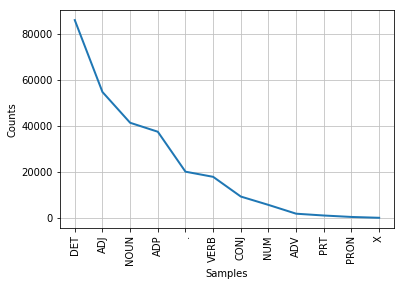

[('DET', 85845),
 ('ADJ', 54653),
 ('NOUN', 41309),
 ('ADP', 37418),
 ('.', 20084),
 ('VERB', 17851),
 ('CONJ', 9294),
 ('NUM', 5668),
 ('ADV', 1851),
 ('PRT', 1068),
 ('PRON', 440),
 ('X', 77)]

In [20]:
fdist.plot()
fdist.most_common()

In [23]:
#Quest อยากได้ว่าคำอะไรที่ตามหลัง ... preposition(ADP)
brown_news_tagged = nltk.corpus.brown.tagged_words(tagset = 'universal')
word_tag_pairs = list(nltk.bigrams(brown_news_tagged))
noun_preceders = [b[1] for (a,b) in word_tag_pairs if a[1] == 'ADP'] 
fdist = nltk.FreqDist(noun_preceders)
fdist.most_common(1)


[('DET', 65962)]

In [32]:
##การบ้าน  ให้นับ taggedword

wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist([(w[0].lower(),w[1]) for w in wsj  if w[1] != '.' and w[1] != 'NUM' and w[1] != 'X'])
print(word_tag_fd[('is','VERB')])
print(word_tag_fd.most_common(50))

672
[(('the', 'DET'), 4753), (('of', 'ADP'), 2325), (('to', 'PRT'), 2179), (('a', 'DET'), 1979), (('in', 'ADP'), 1749), (('and', 'CONJ'), 1549), (('for', 'ADP'), 851), (("'s", 'PRT'), 761), (('is', 'VERB'), 672), (('said', 'VERB'), 628), (('it', 'PRON'), 577), (('that', 'ADP'), 514), (('on', 'ADP'), 500), (('%', 'NOUN'), 445), (('by', 'ADP'), 438), (('at', 'ADP'), 430), (('with', 'ADP'), 398), (('from', 'ADP'), 391), (('mr.', 'NOUN'), 375), (('was', 'VERB'), 367), (('are', 'VERB'), 367), (('as', 'ADP'), 362), (('be', 'VERB'), 356), (('its', 'PRON'), 343), (('has', 'VERB'), 339), (('an', 'DET'), 335), (('that', 'DET'), 331), (("n't", 'ADV'), 325), (('have', 'VERB'), 323), (('but', 'CONJ'), 307), (('he', 'PRON'), 303), (('or', 'CONJ'), 294), (('will', 'VERB'), 280), (('they', 'PRON'), 263), (('company', 'NOUN'), 260), (('this', 'DET'), 224), (('which', 'DET'), 224), (('u.s.', 'NOUN'), 220), (('says', 'VERB'), 217), (('year', 'NOUN'), 214), (('would', 'VERB'), 209), (('were', 'VERB'), 197

In [34]:
## หาคำเฉพาะที่เป็น DET
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist([(w[0].lower(),w[1]) for w in wsj  if w[1] == 'DET'])
print(word_tag_fd.most_common(50))

[(('the', 'DET'), 4753), (('a', 'DET'), 1979), (('an', 'DET'), 335), (('that', 'DET'), 331), (('this', 'DET'), 224), (('which', 'DET'), 224), (('some', 'DET'), 144), (('all', 'DET'), 113), (('any', 'DET'), 106), (('there', 'DET'), 88), (('no', 'DET'), 86), (('these', 'DET'), 77), (('those', 'DET'), 61), (('another', 'DET'), 48), (('each', 'DET'), 46), (('both', 'DET'), 44), (('every', 'DET'), 21), (('half', 'DET'), 14), (('neither', 'DET'), 12), (('such', 'DET'), 7), (('either', 'DET'), 5), (('what', 'DET'), 3), (('la', 'DET'), 1), (('le', 'DET'), 1), (('del', 'DET'), 1), (('whichever', 'DET'), 1)]


In [38]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist([(tag,word) for (word,tag) in wsj])
print(len(cfd2['VBN']), list(cfd2['VBN']))

692 ['named', 'used', 'caused', 'exposed', 'reported', 'replaced', 'sold', 'died', 'expected', 'diagnosed', 'studied', 'industrialized', 'owned', 'found', 'classified', 'rejected', 'outlawed', 'imported', 'tracked', 'thought', 'considered', 'elected', 'based', 'lifted', 'ensnarled', 'voted', 'been', 'held', 'banned', 'renovated', 'prolonged', 'recorded', 'accumulated', 'offered', 'become', 'guaranteed', 'proposed', 'related', 'improved', 'worried', 'cluttered', 'expedited', 'retired', 'ordered', 'collected', 'required', 'received', 'moved', 'determined', 'made', 'changed', 'completed', 'disputed', 'refunded', 'estimated', 'compared', 'located', 'filed', 'scrapped', 'anticipated', 'priced', 'set', 'applied', 'existed', 'incurred', 'reached', 'Regarded', 'paid', 'trained', 'instituted', 'vowed', 'deemed', 'combined', 'removed', 'concerned', 'complained', 'accelerated', 'believed', 'called', 'solved', 'forgiven', 'launched', 'built', 'preferred', 'raised', 'scheduled', 'brought', 'increas

In [83]:
# ข้อ 15.2 คำที่มีติด tag มากที่สุดคือคำว่าอะไร

freq2D = nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words())
sortedDist = sorted([(name,len(freq2D[name])) for name in freq2D.keys()], key=lambda x: x[1],reverse=True)
print(sortedDist[0][0])
print(freq2D[sortedDist[0][0]].keys())

that
dict_keys(['CS', 'WPS', 'DT', 'QL', 'WPO', 'CS-HL', 'DT-NC', 'NIL', 'WPS-NC', 'WPO-NC', 'CS-NC', 'WPS-HL'])


In [84]:
# ข้อ 15.2 คำที่มีติด tag มากที่สุดคือคำว่าอะไร (Universal tag)

freq2D = nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words(tagset='universal'))
sortedDist = sorted([(name,len(freq2D[name])) for name in freq2D.keys()], key=lambda x: x[1],reverse=True)
print(sortedDist[0][0])
print(freq2D[sortedDist[0][0]].keys())

that
dict_keys(['ADP', 'PRON', 'DET', 'ADV', 'X'])


In [86]:
# ข้อ 15.4 tag ที่ตามหลังคำนามเยอะที่สุด
brown_news_tagged = nltk.corpus.brown.tagged_words(tagset = 'universal')
word_tag_pairs = list(nltk.bigrams(brown_news_tagged))
noun_preceders = [b[1] for (a,b) in word_tag_pairs if a[1] == 'NOUN'] 
fdist = nltk.FreqDist(noun_preceders)
print(fdist.most_common(5))


[('.', 78326), ('ADP', 67460), ('VERB', 43819), ('NOUN', 41309), ('CONJ', 16451)]


In [94]:
# ข้อ 15.2 แบบอาจารย์
brown_news_tagged = nltk.corpus.brown.tagged_words(tagset = 'universal')
data = nltk.ConditionalFreqDist((word.lower(), tag) for word,tag in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 4:
        print(word)

damn
down
round
that
to
well


In [95]:
#18 คำไหนกำกวม (ติด tag มากกว่า 2 อันขึ้นไป)
freq2D = nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words(tagset='universal'))
gamgum = [(name,len(freq2D[name])) for name in freq2D.keys() if len(freq2D[name]) >= 2]
print("คำที่กำกวม", len(gamgum))
print("คำที่ไม่กำกวม", len(freq2D.keys())- len(gamgum))


คำที่กำกวม 3596
คำที่ไม่กำกวม 52461


In [96]:
print("Hello world")

Hello world


In [97]:
#หาตำแหน่งคำ และคำหน้า และคำหลัง
idx1 = wsj.index(('kicked','VBD'))
print(wsj[idx1-1:idx1+1])

[('swiftly', 'RB'), ('kicked', 'VBD')]


In [102]:
#ลองใช้ trigram
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
        if t1.startswith('V') and t2 == 'TO' and t3.startswith('V'):
            print(w1,w2,w3)
for tagged_sent in nltk.corpus.brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

help to determine
combine to provide
attempt to compensate
learn to recognize
serve to promote
claim to incarnate
led to emphasize
tend to consider
expected to seek
disposed to compromise
served to provide
mean to imply
mean to imply
attempts to face
need to submit
prepared to run
asked to choose
continuing to incur
seems to think
begin to amass
sought to limit
bring to bear
invited to participate
sought to bring
attempting to explore
seen to consist
committed to avoid
claim to serve
determined to avoid
trying to converse
started to adjust
trying to make
decided to take
forced to conclude
beginning to make
helped to make
made to give
determined to exclude
sought to win
sought to avoid
meant to incur
supposed to result
cited to show
supposed to possess
burned to make
wanted to find
helps to meet
rejoiced to see
began to suspect
began to review
called to sit
began to write
decided to try
takes to tell
seemed to widen
proceeded to teach
helps to make
remember to make
supposed to like
work

begins to gather
brought to pass
tends to reflect
tended to stratify
chosen to use
used to mean
forced to respond
tends to lose
tends to express
made to integrate
try to get
attempted to restrain
wished to continue
failed to flourish
propose to go
wished to segregate
liked to fancy
Deciding to become
strove to see
used to play
returned to live
proceeded to find
likes to catch
seems to care
intends to save
compelled to find
wishes to continue
ceasing to write
stops to ask
expected to fulfill
tailored to meet
want to say
want to quote
seems to realize
primed to catch
try to diagnose
want to point
used to regard
seems to represent
trying to draw
wish to see
used to include
allowed to operate
urged to produce
afford to present
decides to drop
expect to abolish
needed to pit
tempted to blame
hope to serve
tried to remedy
tends to express
seem to believe
permitted to return
attempted to make
prepared to demonstrate
calculated to suggest
seemed to disconcert
known to make
going to talk
learns

invoked to explain
wanted to go
mean to imply
supposed to happen
learning to read
asked to describe
learning to read
expected to earn
expected to earn
surprised to find
struggle to induce
asked to learn
prefer to test
told to purchase
seemed to antagonize
designed to develop
refused to change
refused to change
refused to accept
supposed to know
working to become
led to see
asked to vote
duplicated to form
learn to play
want to change
learns to become
began to emerge
used to annoy
stooping to dispense
come to see
preferred to keep
used to give
came to feel
used to accomplish
found to match
required to store
saved to represent
saved to represent
created to accommodate
inspected to determine
used to look
serve to illustrate
intended to decrease
required to improve
italicized to guide
seems to center
operate to center
serves to focus
purport to represent
hesitates to suggest
mentioned to make
trying to develop
compelled to omit
continue to show
planning to use
expecting to recover
meant to

professed to know
asked to use
leaving to keep
fit to consult
asked to see
wanted to make
continued to discharge
seem to belong
began to flicker
trying to wreck
fit to touch
going to take
trying to clear
want to spend
paused to look
going to allow
like to talk
planning to set
bent to examine
turned to jump
started to retch
going to get
come to recognize
expected to report
failed to see
failed to notify
failed to co-operate
stopping to hear
want to talk
going to cost
wanted to ask
going to get
going to swear
tried to keep
think to look
tried to find
bear to hold
began to pace
tried to tell
intended to scare
began to think
hired to take
going to send
helped to create
wanted to give
led to believe
trying to escape
began to thrash
get to work
come to work
want to see
wanted to get
want to go
managed to swallow
threatened to fire
happen to see
going to eat
began to weep
happens to ask
want to rent
Try to imagine
promised to pay
planning to remarry
determined to get
seemed to swell
surprised

# Automatic Tagging

## Default Tagger

In [105]:
#คำนามพบมากที่สุดติดเป็นนามไปเลย
raw = 'I do not like green eggs and ham, i do not like tem Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('i', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('tem', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [107]:
#ทดสอบความถูกต้อง (สเกล 0-1 ใกล้ 1 = D)
default_tagger.evaluate(nltk.corpus.brown.tagged_sents())

0.13130472824476916

## RegExpTagger

In [111]:
pattern = [
    (r'.*ing$','VBG'),
    (r'.*ed$','VBD'),
    (r'.*es$','VBZ'),
    (r'.*','NN')
]
regexp_tagger = nltk.RegexpTagger(pattern)
print(regexp_tagger.tag(nltk.word_tokenize("I flying to USA")))

[('I', 'NN'), ('flying', 'VBG'), ('to', 'NN'), ('USA', 'NN')]


In [112]:
regexp_tagger.evaluate(nltk.corpus.brown.tagged_sents())

0.15838379871718028

## The Lookup Tagger

In [117]:
brown = nltk.corpus.brown
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word,cfd[word].max()) for (word,_) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model = likely_tags, backoff=nltk.DefaultTagger('NN'))
baseline_tagger.evaluate(brown.tagged_sents())

0.5980888604124038

จากบทนี้เป็นต้นไป
- ใครยังทำเรื่อง dict ไม่ได้ ให้ทำ บฝ 3,5,6,7,8
- ถ้าคล่องแล้ว 1,14,15,18,20,27,33,34,35